In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('vehicles_us_5000.csv')

In [3]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
df.shape

(5097, 13)

In [5]:
del df['is_4wd']

In [6]:
df.shape

(5097, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5097 non-null   int64  
 1   model_year    4740 non-null   float64
 2   model         5097 non-null   object 
 3   condition     5097 non-null   object 
 4   cylinders     4603 non-null   float64
 5   fuel          5097 non-null   object 
 6   odometer      4354 non-null   float64
 7   transmission  5097 non-null   object 
 8   type          5097 non-null   object 
 9   paint_color   4194 non-null   object 
 10  date_posted   5097 non-null   object 
 11  days_listed   5097 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 478.0+ KB


In [8]:
df.describe()

,price,model_year,cylinders,odometer,days_listed
count,5097.000000,4740.000000,4603.000000,4354.000000,5097.000000
mean,12776.574456,2009.737764,6.123181,114456.956362,39.823622
std,10578.789707,6.159706,1.640372,64499.434140,28.643277
min,1.000000,1963.000000,3.000000,0.000000,0.000000
25%,5500.000000,2006.000000,4.000000,70110.000000,19.000000
50%,9850.000000,2011.000000,6.000000,111964.000000,33.000000
75%,17489.000000,2014.000000,8.000000,152000.000000,54.000000
max,189000.000000,2019.000000,10.000000,866000.000000,271.000000


In [9]:
df.isnull().sum()

price             0
model_year      357
model             0
condition         0
cylinders       494
fuel              0
odometer        743
transmission      0
type              0
paint_color     903
date_posted       0
days_listed       0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
date_posted     0
days_listed     0
dtype: int64

In [12]:
df.shape

(3031, 12)

Text(0.5, 1.0, 'Sales data distribution')

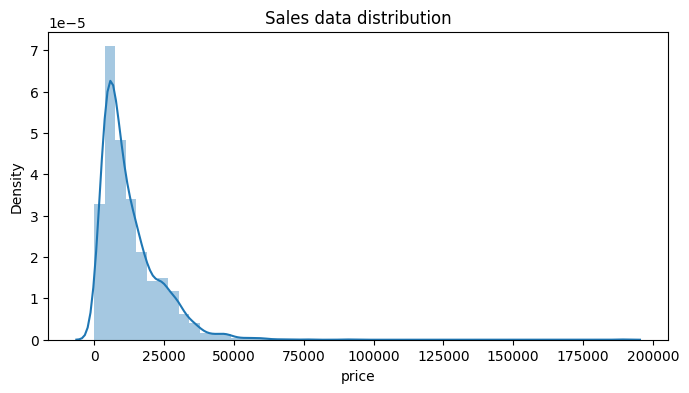

In [13]:
fig=plt.figure(figsize=(8,4))
sns.distplot(df['price'])
plt.title('Sales data distribution')

<AxesSubplot: >

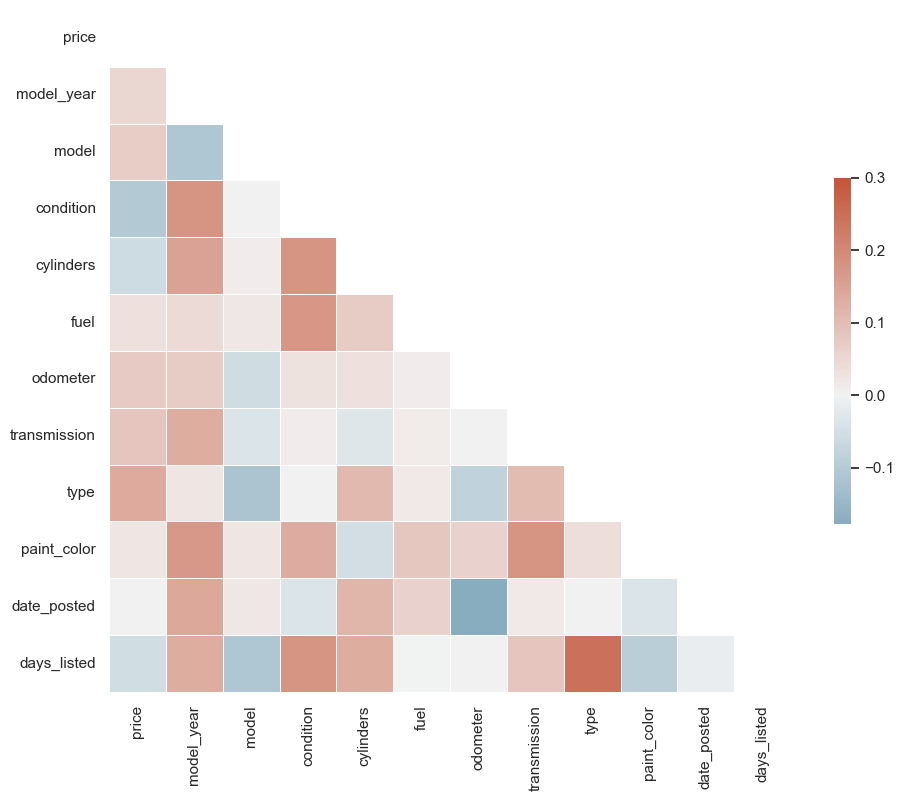

In [14]:
sns.set_theme(style="white")
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 12)),
                 columns=list(df))
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
print(df['paint_color'].unique())
print(df['transmission'].unique())
print(df['type'].unique())

['red' 'black' 'white' 'grey' 'silver' 'custom' 'orange' 'yellow' 'blue'
 'brown' 'green' 'purple']
['automatic' 'manual' 'other']
['sedan' 'SUV' 'pickup' 'truck' 'coupe' 'hatchback' 'van' 'wagon'
 'mini-van' 'convertible' 'other' 'bus' 'offroad']


In [16]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'date_posted',
       'days_listed'],
      dtype='object')

In [17]:
final_dataset=df[['price', 'model_year', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color',
       'date_posted', 'days_listed']]

In [18]:
final_dataset['current_year']=2022

In [19]:
final_dataset['age']=final_dataset['current_year']-final_dataset['model_year']

In [20]:
final_dataset.head()

,price,model_year,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,current_year,age
2,5500,2013.0,like new,4.0,gas,110000.0,automatic,sedan,red,2019-02-07,79,2022,9.0
4,14900,2017.0,excellent,4.0,gas,80903.0,automatic,sedan,black,2019-04-02,28,2022,5.0
5,14990,2014.0,excellent,6.0,gas,57954.0,automatic,sedan,black,2018-06-20,15,2022,8.0
6,12990,2015.0,excellent,4.0,gas,79212.0,automatic,sedan,white,2018-12-27,73,2022,7.0
7,15990,2013.0,excellent,6.0,gas,109473.0,automatic,SUV,black,2019-01-07,68,2022,9.0


In [21]:
final_dataset.drop(['age'],axis=1,inplace=True)

In [22]:
final_dataset.head()

,price,model_year,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,current_year
2,5500,2013.0,like new,4.0,gas,110000.0,automatic,sedan,red,2019-02-07,79,2022
4,14900,2017.0,excellent,4.0,gas,80903.0,automatic,sedan,black,2019-04-02,28,2022
5,14990,2014.0,excellent,6.0,gas,57954.0,automatic,sedan,black,2018-06-20,15,2022
6,12990,2015.0,excellent,4.0,gas,79212.0,automatic,sedan,white,2018-12-27,73,2022
7,15990,2013.0,excellent,6.0,gas,109473.0,automatic,SUV,black,2019-01-07,68,2022


In [23]:
final_dataset.drop(['current_year'],axis=1,inplace=True)

In [24]:
final_dataset.head()

,price,model_year,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed
2,5500,2013.0,like new,4.0,gas,110000.0,automatic,sedan,red,2019-02-07,79
4,14900,2017.0,excellent,4.0,gas,80903.0,automatic,sedan,black,2019-04-02,28
5,14990,2014.0,excellent,6.0,gas,57954.0,automatic,sedan,black,2018-06-20,15
6,12990,2015.0,excellent,4.0,gas,79212.0,automatic,sedan,white,2018-12-27,73
7,15990,2013.0,excellent,6.0,gas,109473.0,automatic,SUV,black,2019-01-07,68


In [25]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [26]:
final_dataset.head()

,price,model_year,cylinders,odometer,days_listed,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,...,date_posted_2019-04-10,date_posted_2019-04-11,date_posted_2019-04-12,date_posted_2019-04-13,date_posted_2019-04-14,date_posted_2019-04-15,date_posted_2019-04-16,date_posted_2019-04-17,date_posted_2019-04-18,date_posted_2019-04-19
2,5500,2013.0,4.0,110000.0,79,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14900,2017.0,4.0,80903.0,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14990,2014.0,6.0,57954.0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,12990,2015.0,4.0,79212.0,73,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15990,2013.0,6.0,109473.0,68,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
final_dataset.corr()

,price,model_year,cylinders,odometer,days_listed,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,...,date_posted_2019-04-10,date_posted_2019-04-11,date_posted_2019-04-12,date_posted_2019-04-13,date_posted_2019-04-14,date_posted_2019-04-15,date_posted_2019-04-16,date_posted_2019-04-17,date_posted_2019-04-18,date_posted_2019-04-19
price,1.000000,0.462674,0.320491,-0.444373,-0.006319,-0.169789,-0.090744,0.093840,0.106407,-0.064351,...,0.002949,0.011805,-0.005936,-0.015778,0.051836,-0.030435,0.025437,-0.023361,0.016953,-0.031821
model_year,0.462674,1.000000,-0.184523,-0.451756,-0.016731,-0.252617,-0.144323,0.094518,0.056385,-0.072680,...,0.014185,0.035104,-0.009470,-0.006090,0.016563,-0.043300,0.011931,-0.000561,0.027936,-0.013547
cylinders,0.320491,-0.184523,1.000000,0.097961,0.015492,0.056963,0.096341,-0.030330,0.032803,0.012792,...,0.023744,-0.004707,0.014784,-0.000643,0.003429,0.008961,0.014784,-0.028513,0.013197,0.010773
odometer,-0.444373,-0.451756,0.097961,1.000000,0.016006,0.158431,0.141675,-0.138779,-0.063191,0.119655,...,-0.007972,-0.018962,0.004763,0.011150,-0.011147,0.027595,-0.018767,0.037072,-0.002780,0.008170
days_listed,-0.006319,-0.016731,0.015492,0.016006,1.000000,0.008399,-0.007324,0.019750,0.001472,-0.005184,...,0.016463,0.000360,-0.012011,-0.016442,0.005650,-0.023806,-0.006385,-0.004747,-0.005438,-0.009391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
date_posted_2019-04-15,-0.030435,-0.043300,0.008961,0.027595,-0.023806,-0.011656,0.009132,-0.017253,-0.003294,-0.004111,...,-0.003472,-0.003961,-0.002688,-0.003472,-0.003294,1.000000,-0.002688,-0.003472,-0.002904,-0.003294
date_posted_2019-04-16,0.025437,0.011931,0.014784,-0.018767,-0.006385,0.031263,-0.004377,-0.012732,-0.002430,-0.003034,...,-0.002562,-0.002923,-0.001983,-0.002562,-0.002430,-0.002688,1.000000,-0.002562,-0.002143,-0.002430
date_posted_2019-04-17,-0.023361,-0.000561,-0.028513,0.037072,-0.004747,-0.011112,0.037784,0.027092,0.102601,-0.003919,...,-0.003310,-0.003776,-0.002562,-0.003310,-0.003140,-0.003472,-0.002562,1.000000,-0.002768,-0.003140
date_posted_2019-04-18,0.016953,0.027936,0.013197,-0.002780,-0.005438,-0.009292,0.018859,-0.013754,-0.002626,-0.003277,...,-0.002768,-0.003158,-0.002143,-0.002768,-0.002626,-0.002904,-0.002143,-0.002768,1.000000,-0.002626


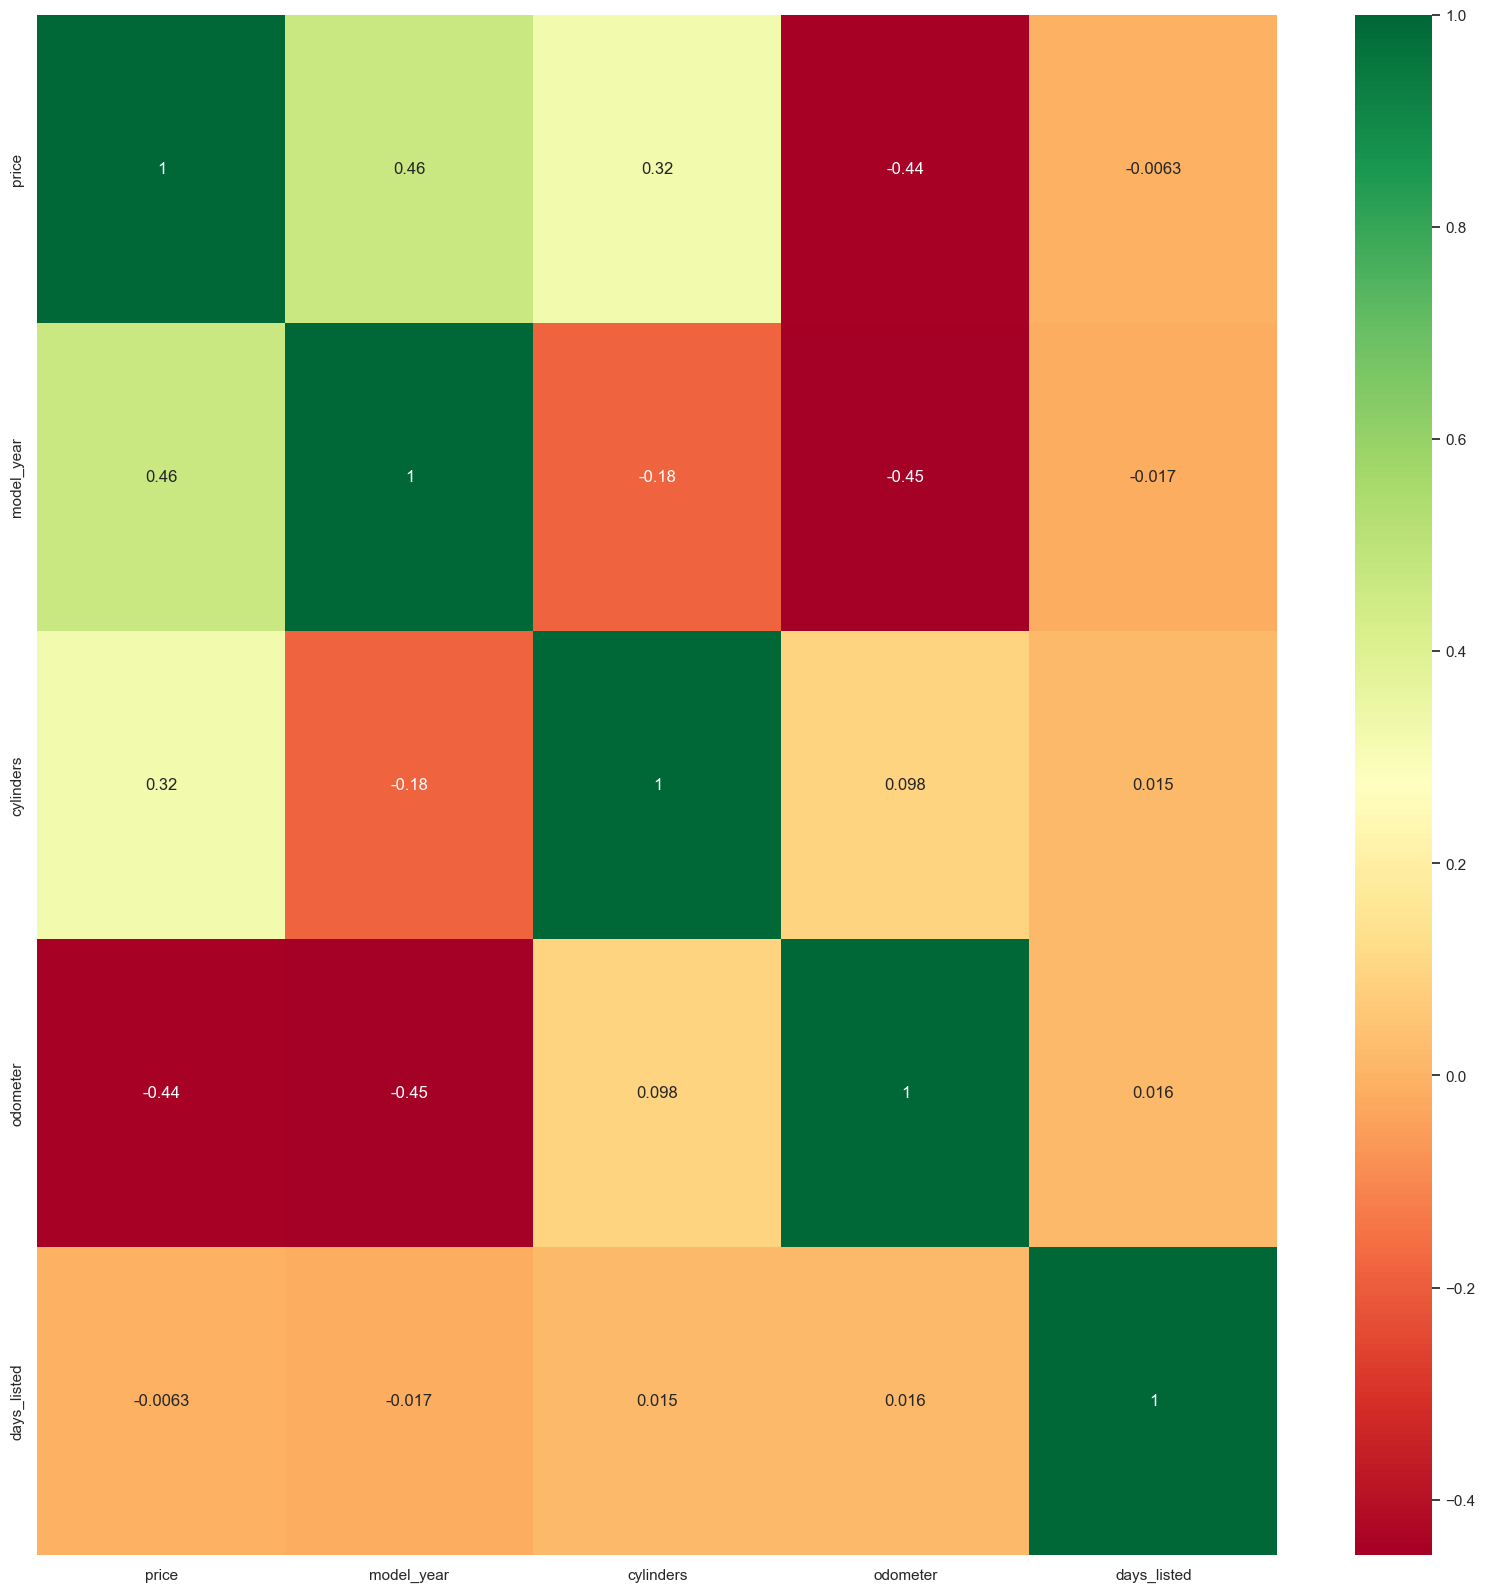

In [28]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
y=final_dataset['price']
y.head()

2     5500
4    14900
5    14990
6    12990
7    15990
Name: price, dtype: int64

In [30]:
X=final_dataset.drop(['price'],axis=1)
X.head()

,model_year,cylinders,odometer,days_listed,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_gas,...,date_posted_2019-04-10,date_posted_2019-04-11,date_posted_2019-04-12,date_posted_2019-04-13,date_posted_2019-04-14,date_posted_2019-04-15,date_posted_2019-04-16,date_posted_2019-04-17,date_posted_2019-04-18,date_posted_2019-04-19
2,2013.0,4.0,110000.0,79,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2017.0,4.0,80903.0,28,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2014.0,6.0,57954.0,15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2015.0,4.0,79212.0,73,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2013.0,6.0,109473.0,68,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [32]:
print(model.feature_importances_)

[3.30475497e-01 1.09384888e-01 1.49153711e-01 1.02083481e-02
 9.91375079e-03 1.05962144e-02 3.17662908e-03 2.28851205e-03
 8.44571751e-04 4.92179833e-02 1.55451627e-03 1.22688442e-03
 4.40044551e-03 3.75362981e-03 1.37239786e-04 2.13828179e-03
 6.57468225e-03 2.52354938e-03 4.75573267e-03 1.02800674e-04
 8.42031692e-04 6.12590980e-03 6.07855798e-02 3.10277104e-02
 3.91389615e-04 6.30716554e-04 2.72986036e-03 1.10508504e-03
 9.80991010e-04 1.26609518e-03 3.02956102e-03 6.04738903e-04
 3.26777828e-05 6.86348918e-03 2.63023757e-03 4.58697289e-03
 5.96145496e-04 1.63565787e-04 1.97615586e-04 6.07962303e-04
 7.90721303e-05 1.26796472e-03 1.18078303e-03 2.29308285e-04
 2.98606212e-05 4.81514182e-05 1.58317708e-04 2.58181765e-05
 4.87721377e-05 4.57205406e-04 6.95141546e-05 1.73520307e-05
 4.93770282e-05 1.32717101e-04 1.63308138e-05 2.63732734e-04
 1.33279799e-04 1.46812675e-04 1.38362796e-04 1.84239299e-03
 1.56197288e-04 7.90205783e-06 8.38343205e-04 6.91208695e-04
 3.67011918e-04 2.792616

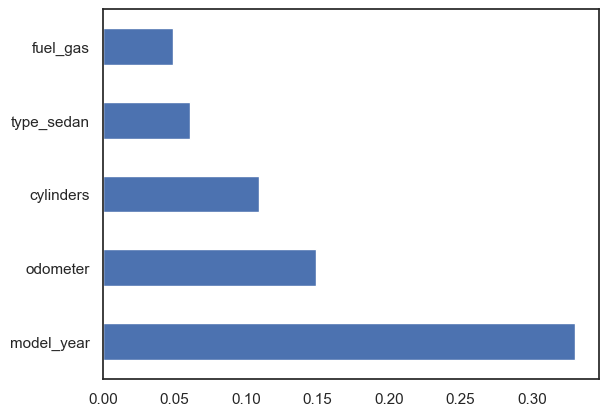

In [33]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [34]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [36]:
random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
train_acc=random_forest_regressor.score(X_train,y_train)
test_acc=random_forest_regressor.score(X_test,y_test)
print('Training Accuracy: ',round(train_acc*100, 2),'%')
print('Testing Accuracy: ',round(test_acc*100, 2),'%')

Training Accuracy:  94.49 %
Testing Accuracy:  75.36 %


In [38]:
predictions=random_forest_regressor.predict(X_test)
predictions

array([15745.44,  5879.09,  8367.91,  3429.17,  7113.3 , 15358.63,
        5832.42,  8870.27, 31065.04,  6042.01,  6162.32,  8487.32,
       18866.21, 13886.99, 32087.71,  4150.27, 12105.84, 14576.35,
        5626.03,  6710.79, 17276.97, 18344.39,  6253.57,  8521.29,
       27909.98,  3862.68,  3648.83,  8160.87, 10471.34, 39866.47,
       30170.95,  8302.48,  9227.63, 16470.64,  3373.24,  6898.49,
        8476.75, 27707.98,  3693.39, 22269.24,  5109.73,  6035.92,
        2371.42,  5739.99,  9326.86,  8146.92, 10545.38,  3763.8 ,
        6414.1 , 11739.06, 21451.91, 10348.16,  9682.53,  8097.15,
       19301.05,  6583.39, 11033.46,  9229.76, 25302.69, 17578.23,
        4358.93,  6132.88,  6598.85,  9318.61,  4681.83, 14994.09,
        6214.08,  6700.39,  3508.01,  9614.7 ,  4494.7 , 25269.35,
       15394.13,  6674.81,  5009.13,  5480.83, 20447.97, 14789.91,
        5089.  , 35889.46, 22573.29,  4125.74,  5879.48, 33318.16,
        6631.2 ,  8416.45, 15413.61, 10032.66, 27464.91, 29875

<AxesSubplot: xlabel='price', ylabel='Density'>

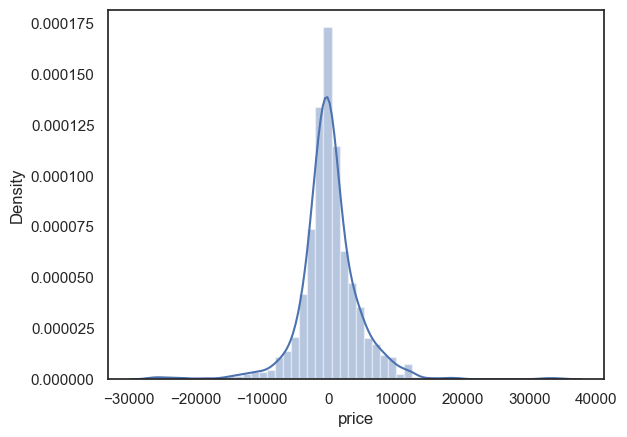

In [39]:
sns.distplot(y_test-predictions)

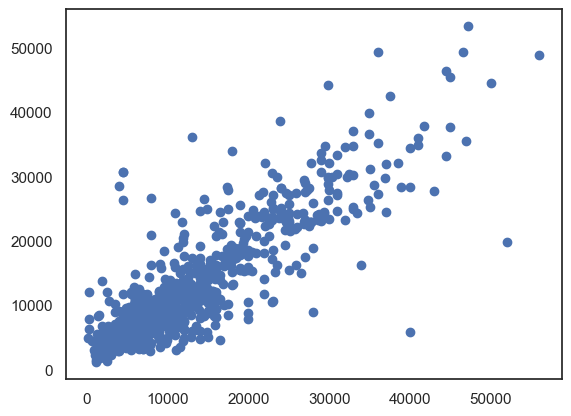

In [40]:
plt.scatter(y_test,predictions)